In [1]:
import pandas as pd
import numpy as np

import pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_path = '../data/raw/'
interim_path = '../data/interim/'
result_path = '../submits/'
figures_path = '../reports/figures/'

In [3]:
test = pd.read_csv(data_path+'submission_format.csv',dtype={'obs_id':np.int32,'meter_id':str,
                                                            'Timestamp':str, 'is_abnormal':bool})
test.Timestamp = pd.to_datetime(test.Timestamp)

In [4]:
with open(interim_path+'train_nn_knn_234_203.pkl', 'rb') as f:
    train_234_203 = pickle.load(f)
with open(interim_path+'train_nn_knn_334_61.pkl', 'rb') as f:
    train_334_61 = pickle.load(f)
with open(interim_path+'train_nn_knn_38.pkl', 'rb') as f:
    train_38 = pickle.load(f)    

In [5]:
### You can check if you have the same number of labeled anomalies. For best submission I had 
###(144,220,503) of anomalies here. 


train_38.is_abnormal.sum(),train_234_203.is_abnormal.sum(),train_334_61.is_abnormal.sum()

(139, 228, 511)

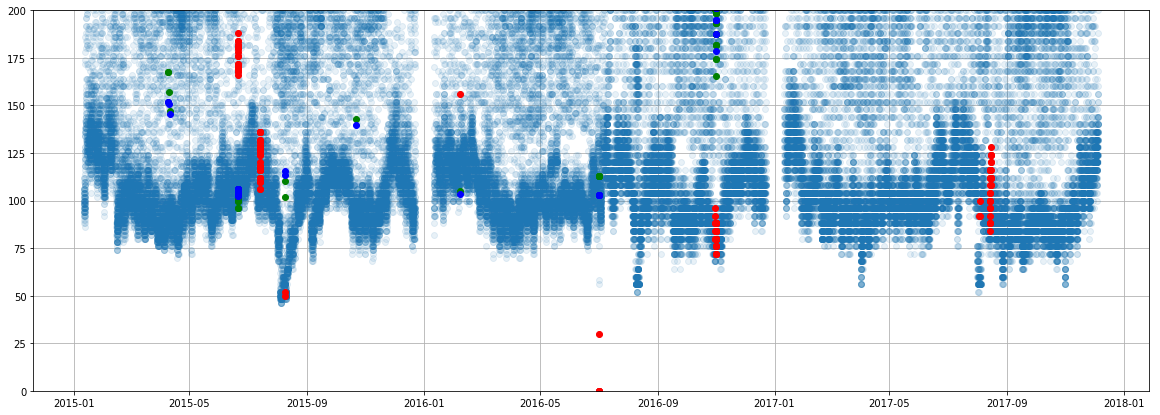

In [6]:
target = 'Values_mod'
plt.figure(figsize=(20,7))
plt.plot(train_38.Timestamp,train_38[target], 'o',alpha = 0.1)

plt.plot(train_38[train_38['is_abnormal'] == True].Timestamp,train_38[train_38['is_abnormal'] == True][target], 'ro')
plt.plot(train_38[train_38['is_abnormal'] == True].Timestamp,train_38[train_38['is_abnormal'] == True].Values_pred_1, 'go')
plt.plot(train_38[train_38['is_abnormal'] == True].Timestamp,train_38[train_38['is_abnormal'] == True].Values_pred_2, 'bo')
plt.ylim(-0,200)
plt.grid(True)

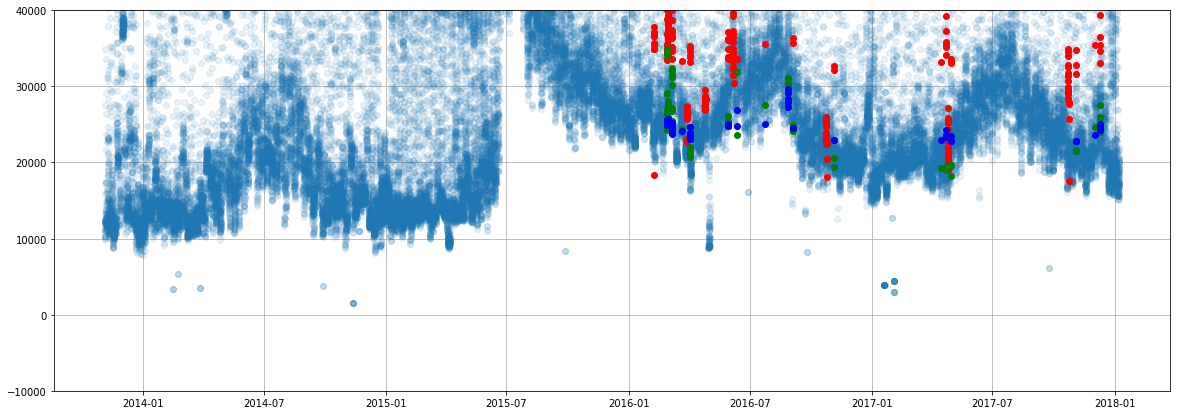

In [7]:
target = 'Values'
plt.figure(figsize=(20,7))
plt.plot(train_234_203.Timestamp,train_234_203[target], 'o',alpha = 0.1)


plt.plot(train_234_203[train_234_203['is_abnormal'] == True].Timestamp,train_234_203[train_234_203['is_abnormal'] == True][target], 'ro')
plt.plot(train_234_203[train_234_203['is_abnormal'] == True].Timestamp,train_234_203[train_234_203['is_abnormal'] == True].Values_pred_1, 'go')
plt.plot(train_234_203[train_234_203['is_abnormal'] == True].Timestamp,train_234_203[train_234_203['is_abnormal'] == True].Values_pred_2, 'bo')
plt.ylim(-10000,40000)
plt.grid(True)

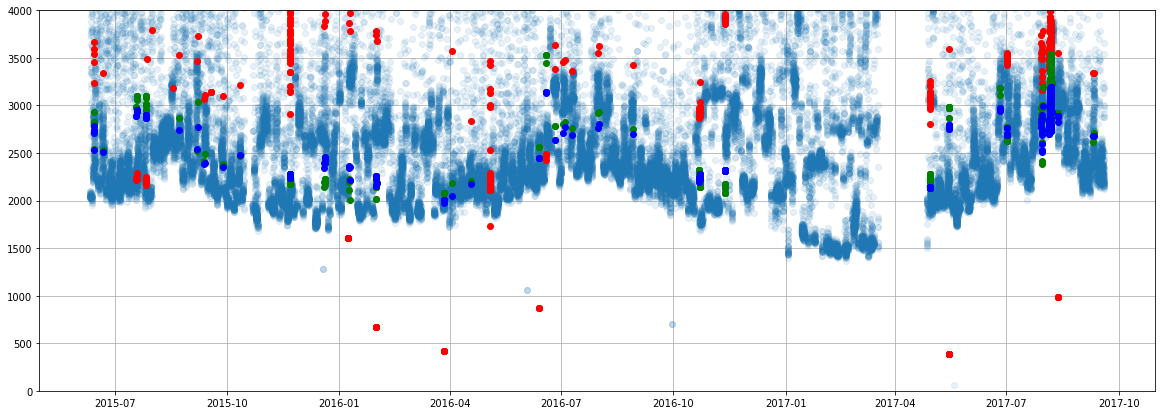

In [8]:
target = 'Values'
plt.figure(figsize=(20,7))
plt.plot(train_334_61.Timestamp,train_334_61[target], 'o',alpha = 0.1)


plt.plot(train_334_61[train_334_61['is_abnormal'] == True].Timestamp,train_334_61[train_334_61['is_abnormal'] == True][target], 'ro')
plt.plot(train_334_61[train_334_61['is_abnormal'] == True].Timestamp,train_334_61[train_334_61['is_abnormal'] == True].Values_pred_1, 'go')
plt.plot(train_334_61[train_334_61['is_abnormal'] == True].Timestamp,train_334_61[train_334_61['is_abnormal'] == True].Values_pred_2, 'bo')
plt.ylim(-0,4000)
plt.grid(True)

In [9]:
train_334_61.loc[train_334_61.Values<2500, 'is_abnormal'] = False
train_38.loc[train_38.Values_mod<100, 'is_abnormal'] = False
train_234_203.loc[train_234_203.Values<30000, 'is_abnormal'] = False

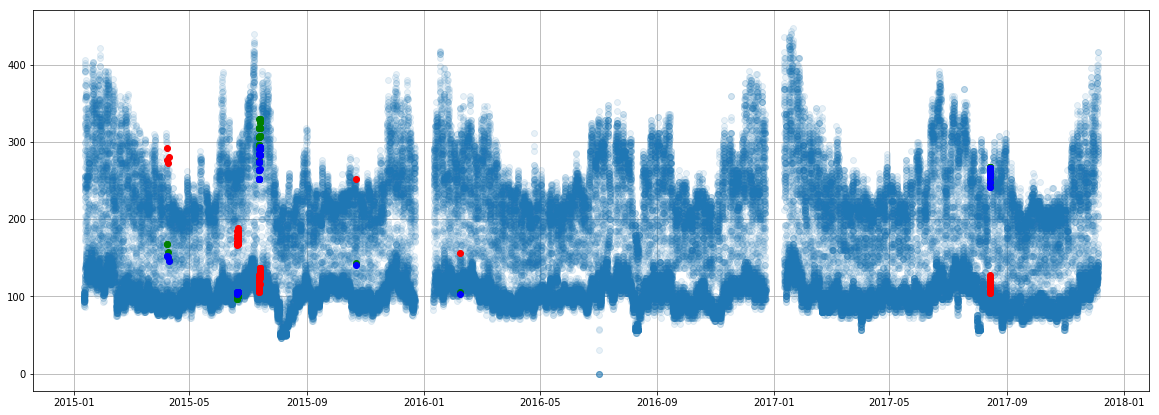

In [10]:
target = 'Values_mod'
plt.figure(figsize=(20,7))
plt.plot(train_38.Timestamp,train_38[target], 'o',alpha = 0.1)


plt.plot(train_38[train_38['is_abnormal'] == True].Timestamp,train_38[train_38['is_abnormal'] == True][target], 'ro')
plt.plot(train_38[train_38['is_abnormal'] == True].Timestamp,train_38[train_38['is_abnormal'] == True].Values_pred_1, 'go')
plt.plot(train_38[train_38['is_abnormal'] == True].Timestamp,train_38[train_38['is_abnormal'] == True].Values_pred_2, 'bo')
#plt.ylim(-10000,160000)
plt.grid(True)

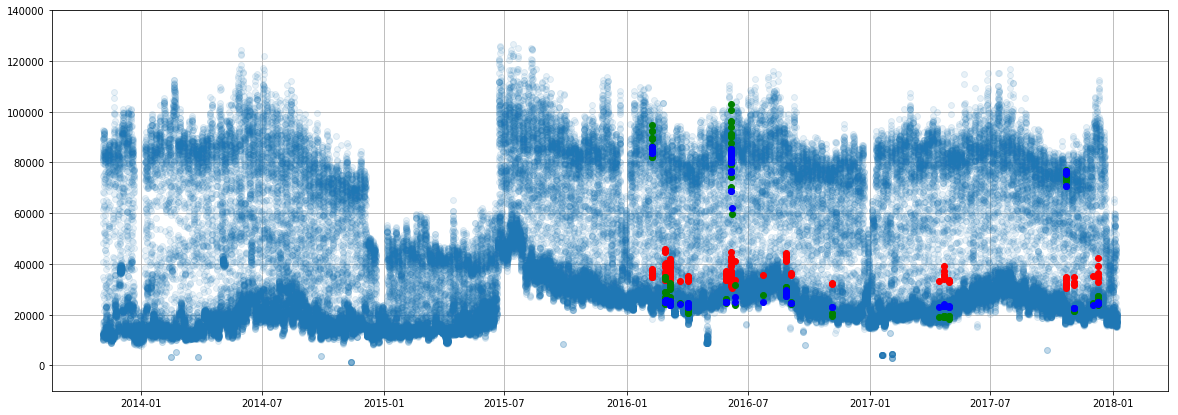

In [11]:
target = 'Values'
plt.figure(figsize=(20,7))
plt.plot(train_234_203.Timestamp,train_234_203[target], 'o',alpha = 0.1)


plt.plot(train_234_203[train_234_203['is_abnormal'] == True].Timestamp,train_234_203[train_234_203['is_abnormal'] == True][target], 'ro')
plt.plot(train_234_203[train_234_203['is_abnormal'] == True].Timestamp,train_234_203[train_234_203['is_abnormal'] == True].Values_pred_1, 'go')
plt.plot(train_234_203[train_234_203['is_abnormal'] == True].Timestamp,train_234_203[train_234_203['is_abnormal'] == True].Values_pred_2, 'bo')
plt.ylim(-10000,140000)
plt.grid(True)

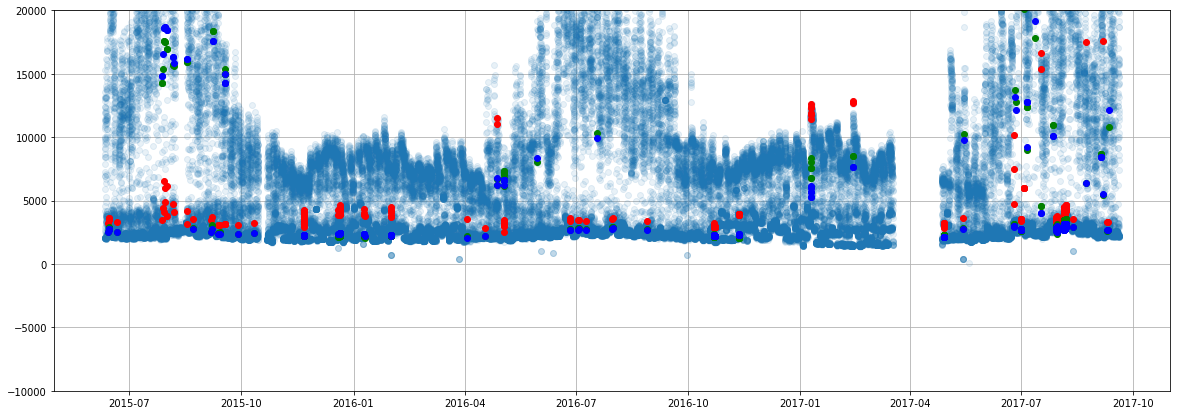

In [12]:
target = 'Values'
plt.figure(figsize=(20,7))
plt.plot(train_334_61.Timestamp,train_334_61[target], 'o',alpha = 0.1)


plt.plot(train_334_61[train_334_61['is_abnormal'] == True].Timestamp,train_334_61[train_334_61['is_abnormal'] == True][target], 'ro')
plt.plot(train_334_61[train_334_61['is_abnormal'] == True].Timestamp,train_334_61[train_334_61['is_abnormal'] == True].Values_pred_1, 'go')
plt.plot(train_334_61[train_334_61['is_abnormal'] == True].Timestamp,train_334_61[train_334_61['is_abnormal'] == True].Values_pred_2, 'bo')
plt.ylim(-10000,20000)
plt.grid(True)

In [13]:
### here I had (91,135,431) anomalies for the best submission

train_38.is_abnormal.sum(),train_234_203.is_abnormal.sum(),train_334_61.is_abnormal.sum()

(85, 144, 437)

In [14]:
test = test.drop('is_abnormal',axis = 1).join(train_234_203[['meter_id','Timestamp','is_abnormal']].set_index( ['meter_id','Timestamp']),
                                      on = ['meter_id','Timestamp'])
test = test.join(train_334_61[['meter_id','Timestamp','is_abnormal']].set_index( ['meter_id','Timestamp']),
                                      on = ['meter_id','Timestamp'], rsuffix = '_1')
test = test.join(train_38[['meter_id','Timestamp','is_abnormal']].set_index( ['meter_id','Timestamp']),
                                      on = ['meter_id','Timestamp'], rsuffix = '_2')

In [15]:
test.is_abnormal.fillna(test.is_abnormal_1,inplace = True)
test.is_abnormal.fillna(test.is_abnormal_2,inplace = True)

In [16]:
test.drop(['is_abnormal_1'],inplace = True,axis = 1)
test.drop(['is_abnormal_2'],inplace = True,axis = 1)

In [17]:
test.fillna(False,inplace = True)

In [18]:
test.is_abnormal.sum()

666

In [19]:
test.to_csv(result_path+'submission_3_bldngs_7111.csv',index = False)